# Table of Contents for Data Map Development

1. **Overview of Data Map Development Process**
   - Introduction to data mapping in the context of the Census Bureau metadata project.

2. **Section 1: Understanding and Documenting Data Relationships**
   - What is it?
   - Why is it important?
   - Value/Benefit (So What?)
   - How are we going to do it?

3. **Section 2: Loading and Exploring Data in Jupyter Notebook**
   - Loading tables using Pandas.
   - Handling chunked files and large datasets.

4. **Section 3: Identifying Key Entities and Relationships**
   - Extracting primary keys, foreign keys, and common columns.
   - Establishing table linkages.

5. **Section 4: Creating a High-Level Data Map**
   - Visual representation of relationships between tables.
   - Using tools like NetworkX or draw.io to create diagrams.

6. **Section 5: Documenting Insights and Findings**
   - Documenting relationships, entities, and initial hypotheses.

7. **Section 6: Iterative Refinement**
   - Revisiting data relationships and refining based on new insights.

8. **Section 7: Integrating with Ontology Tools**
   - Moving from data relationships to ontology development in Protégé.
  
---

## Section 1: Understanding and Documenting Data Relationships

### **What is it?**
Understanding and documenting data relationships involves identifying how various datasets are related, focusing on the key columns, common elements, and potential connections that exist between them. This includes relationships such as foreign keys, primary keys, or any shared data fields between tables.

### **Why is it Important?**
Understanding these relationships is crucial for creating a cohesive ontology and, eventually, a functional knowledge graph. Without understanding how datasets are linked, any attempt to structure or model the data becomes arbitrary and disconnected. Proper relationships provide the backbone for building an integrated system that can generate meaningful insights.

### **Value/Benefit (So What?)**
Documenting data relationships allows us to visualize the interconnections and establish the foundation for both the ontology and the knowledge graph. This clarity helps in avoiding redundancy, managing dependencies, and ensuring that we can effectively query and retrieve information across different datasets.

### **How Are We Going to Do It?**
We will start by loading sample data from each of the key CSV files into Jupyter Notebook, using Pandas for data manipulation. We will then identify key columns such as `ID` fields, potential `foreign keys`, and any other common columns across datasets. Finally, we will create a visual representation of these relationships using tools like NetworkX or draw.io, which will act as the basis for developing the ontology.

---

## Section 1.1 Extract, Load, and Analyze Data

In [1]:
import pandas as pd
import os

# Set up paths for the data directory and files
data_dir = '../data/data_extraction/'

# Define paths for each CSV file to be loaded
examples_node_path = os.path.join(data_dir, 'ExamplesNode.csv')
geography_node_path = os.path.join(data_dir, 'GeographyNode.csv')
survey_group_node_path = os.path.join(data_dir, 'SurveyGroupNode.csv')
survey_node_path = os.path.join(data_dir, 'SurveyNode.csv')
survey_variables_no_group_node_path = os.path.join(data_dir, 'SurveyVariablesNoGroupNode.csv')
processed_group_node_chunk_path = os.path.join(data_dir, 'GroupNodesWithVariables/Processed_GroupNode_chunk_000.csv')

# Load each CSV file into a pandas DataFrame
examples_df = pd.read_csv(examples_node_path, low_memory=False)
geography_df = pd.read_csv(geography_node_path, low_memory=False)
survey_group_df = pd.read_csv(survey_group_node_path, low_memory=False)
survey_df = pd.read_csv(survey_node_path, low_memory=False)
survey_variables_no_group_df = pd.read_csv(survey_variables_no_group_node_path, low_memory=False)
processed_group_node_chunk_df = pd.read_csv(processed_group_node_chunk_path, low_memory=False)

# List and Analyze Data

# 1. List column names for each DataFrame
print("ExamplesNode Columns:", examples_df.columns)
print("\nGeographyNode Columns:", geography_df.columns)
print("\nSurveyGroupNode Columns:", survey_group_df.columns)
print("\nSurveyNode Columns:", survey_df.columns)
print("\nSurveyVariablesNoGroupNode Columns:", survey_variables_no_group_df.columns)
print("\nProcessed_GroupNode_chunk_000 Columns:", processed_group_node_chunk_df.columns)

# 2. Identify shared columns between SurveyNode and other DataFrames
shared_columns_examples = set(survey_df.columns).intersection(examples_df.columns)
shared_columns_geography = set(survey_df.columns).intersection(geography_df.columns)
shared_columns_survey_group = set(survey_df.columns).intersection(survey_group_df.columns)
shared_columns_survey_variables = set(survey_df.columns).intersection(survey_variables_no_group_df.columns)
shared_columns_processed_group = set(survey_df.columns).intersection(processed_group_node_chunk_df.columns)

print("\nShared Columns with ExamplesNode:", shared_columns_examples)
print("Shared Columns with GeographyNode:", shared_columns_geography)
print("Shared Columns with SurveyGroupNode:", shared_columns_survey_group)
print("Shared Columns with SurveyVariablesNoGroupNode:", shared_columns_survey_variables)
print("Shared Columns with Processed_GroupNode_chunk_000:", shared_columns_processed_group)

# 3. Analyze potential keys (look for ID columns or unique fields)
# Check for columns that might serve as Primary Keys or Foreign Keys in each DataFrame
print("\nSurveyNode Info:")
print(survey_df.info())
print("\nGeographyNode Info:")
print(geography_df.info())
print("\nSurveyGroupNode Info:")
print(survey_group_df.info())
print("\nExamplesNode Info:")
print(examples_df.info())
print("\nSurveyVariablesNoGroupNode Info:")
print(survey_variables_no_group_df.info())
print("\nProcessed_GroupNode_chunk_000 Info:")
print(processed_group_node_chunk_df.info())

# Check if the columns are unique across each DataFrame to identify Primary Keys
for df, name in zip([survey_df, geography_df, survey_group_df, examples_df, survey_variables_no_group_df, processed_group_node_chunk_df],
                    ['SurveyNode', 'GeographyNode', 'SurveyGroupNode', 'ExamplesNode', 'SurveyVariablesNoGroupNode', 'Processed_GroupNode_chunk_000']):
    for column in df.columns:
        if df[column].is_unique:
            print(f"Column '{column}' in {name} is potentially a Primary Key.")


ExamplesNode Columns: Index(['Geography Hierarchy', 'Geography Level', 'Example URL', 'Number',
       'SurveyID'],
      dtype='object')

GeographyNode Columns: Index(['ReferenceDate', 'GeographyLevel', 'GeographyHierarchy', 'Limit',
       'SurveyID'],
      dtype='object')

SurveyGroupNode Columns: Index(['SurveyID', 'GroupName', 'GroupDescription', 'GroupLink',
       'SurveyGroupID'],
      dtype='object')

SurveyNode Columns: Index(['Title', 'Description', 'Vintage', 'Dataset Name', 'Dataset Type',
       'Geography List', 'Variable List', 'Group List', 'SortList', 'Examples',
       'Developer Documentation', 'API Base URL', 'Survey', 'Subtype1',
       'Subtype2', 'Subtype3', 'Month', 'identifier', 'id_name', 'SurveyID',
       'Has Example', 'Has Sort', 'Has Geography', 'Has Group',
       'SurveyGroupID'],
      dtype='object')

SurveyVariablesNoGroupNode Columns: Index(['SurveyID', 'Variable Name', 'Label', 'Concept', 'Required',
       'Attributes', 'Limit', 'Predicate Type

## 1.2 Create High Level Datamap

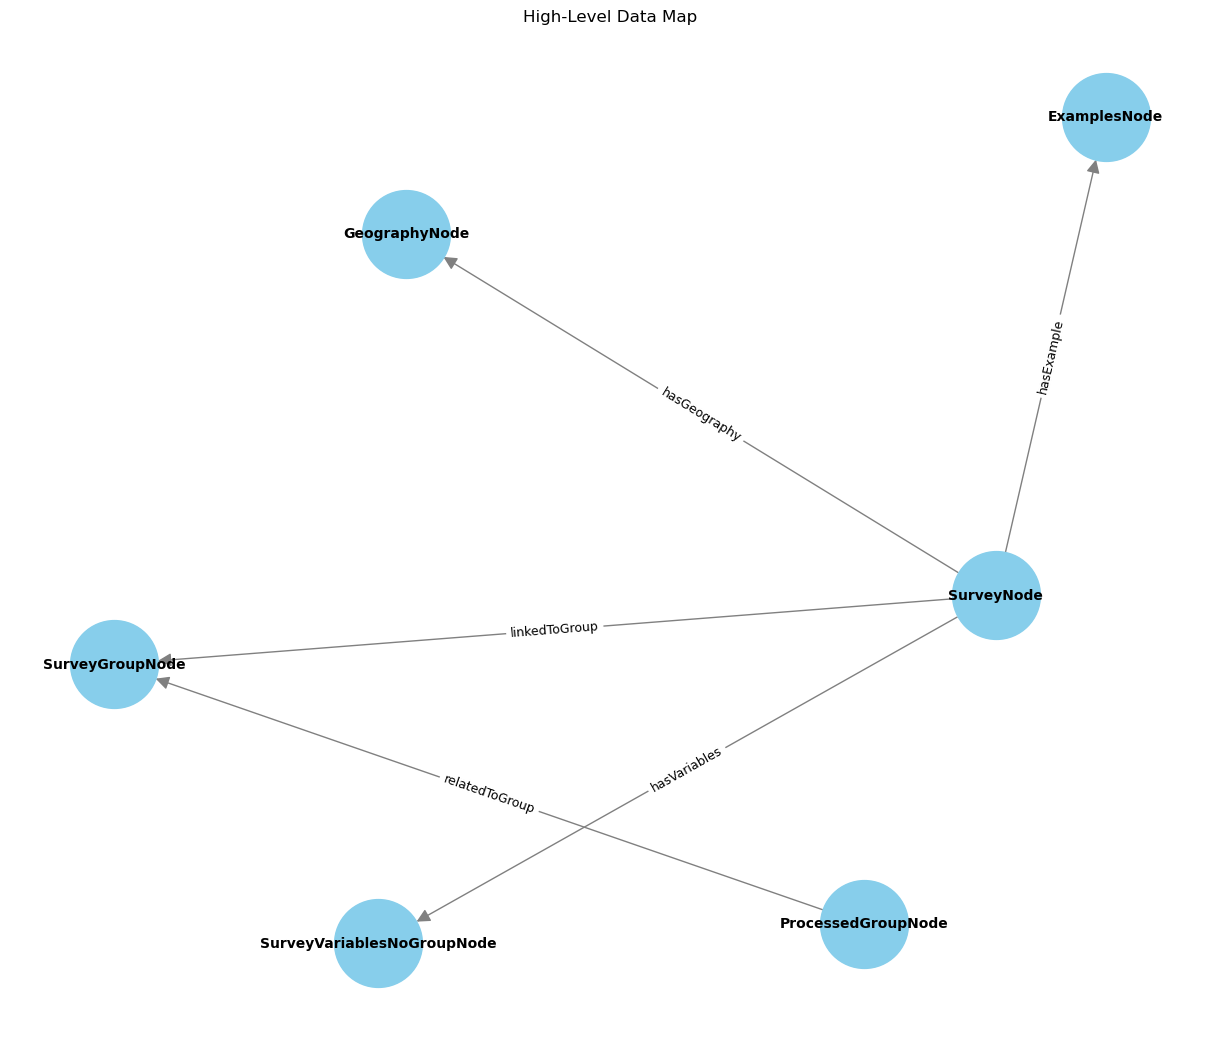

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes for each entity (table)
nodes = [
    'SurveyNode', 'ExamplesNode', 'GeographyNode',
    'SurveyGroupNode', 'SurveyVariablesNoGroupNode', 'ProcessedGroupNode'
]
G.add_nodes_from(nodes)

# Add edges (relationships) between tables based on the shared columns found in Step 1
# Modify these relationships based on what you found in the previous analysis
edges = [
    ('SurveyNode', 'GeographyNode', 'hasGeography'),
    ('SurveyNode', 'ExamplesNode', 'hasExample'),
    ('SurveyNode', 'SurveyGroupNode', 'linkedToGroup'),
    ('SurveyNode', 'SurveyVariablesNoGroupNode', 'hasVariables'),
    ('ProcessedGroupNode', 'SurveyGroupNode', 'relatedToGroup')
]
G.add_edges_from([(src, dst, {'label': label}) for src, dst, label in edges])

# Try using a different layout for better visualization
pos = nx.kamada_kawai_layout(G)  # Kamada-Kawai layout for better spacing
plt.figure(figsize=(12, 10))  # Increase figure size to help with spacing

# Draw nodes and edges
nx.draw(G, pos, with_labels=True, node_size=4000, node_color='skyblue', font_size=10, font_weight='bold', edge_color='grey', arrowsize=20)

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9, label_pos=0.5)

plt.title("High-Level Data Map")
plt.show()


## Step 1.3 Extract ontology information

In [5]:
# Import necessary libraries
import pandas as pd
import networkx as nx

# Assuming the graph G from earlier is already created and we have loaded the DataFrames

# Extract Nodes (which will become Classes)
nodes = list(G.nodes)

# Extract Relationships (which will become Object Properties)
edges = []
for src, dst, data in G.edges(data=True):
    edges.append((src, data['label'], dst))

# Dictionary to store classes and their attributes (Data Properties)
classes_attributes = {}

# For each DataFrame, extract column names to be attributes of the respective node
dataframes = {
    'SurveyNode': survey_df,
    'ExamplesNode': examples_df,
    'GeographyNode': geography_df,
    'SurveyGroupNode': survey_group_df,
    'SurveyVariablesNoGroupNode': survey_variables_no_group_df,
    'ProcessedGroupNode': processed_group_node_chunk_df
}

for class_name, df in dataframes.items():
    # Get a list of column names as attributes (Data Properties)
    attributes = df.columns.tolist()
    classes_attributes[class_name] = attributes

# Print out the summary to help in ontology building
print("Ontology Summary\n")

# Print Classes
print("Classes (Entities):")
for node in nodes:
    print(f" - {node}")
print("\n")

# Print Object Properties (Relationships)
print("Object Properties (Relationships):")
for src, label, dst in edges:
    print(f" - {src} --{label}--> {dst}")
print("\n")

# Print Data Properties (Attributes)
print("Data Properties (Attributes) for each Class:")
for class_name, attributes in classes_attributes.items():
    print(f" - {class_name}:")
    for attribute in attributes:
        print(f"   - {attribute}")
print("\n")


Ontology Summary

Classes (Entities):
 - SurveyNode
 - ExamplesNode
 - GeographyNode
 - SurveyGroupNode
 - SurveyVariablesNoGroupNode
 - ProcessedGroupNode


Object Properties (Relationships):
 - SurveyNode --hasGeography--> GeographyNode
 - SurveyNode --hasExample--> ExamplesNode
 - SurveyNode --linkedToGroup--> SurveyGroupNode
 - SurveyNode --hasVariables--> SurveyVariablesNoGroupNode
 - ProcessedGroupNode --relatedToGroup--> SurveyGroupNode


Data Properties (Attributes) for each Class:
 - SurveyNode:
   - Title
   - Description
   - Vintage
   - Dataset Name
   - Dataset Type
   - Geography List
   - Variable List
   - Group List
   - SortList
   - Examples
   - Developer Documentation
   - API Base URL
   - Survey
   - Subtype1
   - Subtype2
   - Subtype3
   - Month
   - identifier
   - id_name
   - SurveyID
   - Has Example
   - Has Sort
   - Has Geography
   - Has Group
   - SurveyGroupID
 - ExamplesNode:
   - Geography Hierarchy
   - Geography Level
   - Example URL
   - Number

### Results
We have a detailed ontology summary, which includes classes, object properties (relationships), and data properties (attributes) for each class. 


## Step 1.4 Format Data for Protege
Now, let's create a script that processes this summary to generate a structure that can be easily imported or built in Protégé. This script will help automate the steps needed to create the ontology.

**Goal of the Script**:
The goal is to generate a structured representation (in OWL or another format that Protégé understands) that can be used to build the ontology efficiently. For this purpose, we'll create a simple Turtle (TTL) format file, which is compatible with Protégé and easy to parse.

**Python Script to Generate Ontology in Turtle Format**:
Below is a Python script that takes your ontology summary and generates the corresponding Turtle (TTL) format. This format can be imported into Protégé to establish the classes, relationships, and attributes.

In [20]:
import os

# Function to write the ontology in Turtle (TTL) format
def generate_ontology_ttl(classes, object_properties, data_properties, output_dir):
    ttl_lines = []

    # Prefixes and ontology declaration
    ttl_lines.append("@prefix : <http://example.org/ontology#> .")
    ttl_lines.append("@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .")
    ttl_lines.append("@prefix owl: <http://www.w3.org/2002/07/owl#> .")
    ttl_lines.append("@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .")
    ttl_lines.append("@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .")
    ttl_lines.append("<http://example.org/ontology> rdf:type owl:Ontology .")
    ttl_lines.append("")

    # Define Classes with Labels
    for class_name in classes:
        ttl_lines.append(f":{class_name} rdf:type owl:Class ;")
        ttl_lines.append(f"    rdfs:label \"{class_name.replace('_', ' ')}\" .")
    ttl_lines.append("")

    # Define Object Properties with Labels
    for rel in object_properties:
        # Handle the parsing more robustly
        parts = rel.split('-->')
        if len(parts) < 2:
            print(f"Warning: Skipping invalid object property definition: {rel}")
            continue

        src_and_prop = parts[0].split('--')
        if len(src_and_prop) < 2:
            print(f"Warning: Skipping invalid object property definition: {rel}")
            continue

        src = src_and_prop[0].strip()
        prop = src_and_prop[1].strip()
        dst = parts[1].strip()

        ttl_lines.append(f":{prop} rdf:type owl:ObjectProperty ;")
        ttl_lines.append(f"    rdfs:domain :{src} ;")
        ttl_lines.append(f"    rdfs:range :{dst} ;")
        ttl_lines.append(f"    rdfs:label \"{prop.replace('_', ' ')}\" .")
        ttl_lines.append("")

    # Define Data Properties with Unique Names and Labels
    for class_name, attributes in data_properties.items():
        for attribute in attributes:
            # Sanitize property name to be valid in Turtle syntax and make it unique
            prop_name = "".join(
                c if c.isalnum() or c == '_' else '_' 
                for c in attribute.replace(" ", "_")
            )
            # Ensure prop_name starts with a letter
            if not prop_name[0].isalpha():
                prop_name = 'p_' + prop_name

            # Make property names unique by appending class name
            unique_prop_name = f"{prop_name}_{class_name}"

            ttl_lines.append(f":{unique_prop_name} rdf:type owl:DatatypeProperty ;")
            ttl_lines.append(f"    rdfs:domain :{class_name} ;")
            ttl_lines.append(f"    rdfs:range xsd:string ;")
            ttl_lines.append(f"    rdfs:label \"{attribute.replace('_', ' ')} for {class_name}\" .")
            ttl_lines.append("")

    # Ensure output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Generate output path
    output_path = os.path.join(output_dir, "initial_ontology.ttl")

    # Write to file
    with open(output_path, "w", encoding='utf-8') as f:
        for line in ttl_lines:
            f.write(line + "\n")

    print("Turtle file has been generated and saved to:", output_path)

# Ontology Summary Data (from your provided summary)
classes = [
    "SurveyNode", "ExamplesNode", "GeographyNode",
    "SurveyGroupNode", "SurveyVariablesNoGroupNode", "ProcessedGroupNode"
]

object_properties = [
    "SurveyNode --hasGeography--> GeographyNode",
    "SurveyNode --hasExample--> ExamplesNode",
    "SurveyNode --linkedToGroup--> SurveyGroupNode",
    "SurveyNode --hasVariables--> SurveyVariablesNoGroupNode",
    "ProcessedGroupNode --relatedToGroup--> SurveyGroupNode"
]

data_properties = {
    "SurveyNode": [
        "Title", "Description", "Vintage", "Dataset Name", "Dataset Type", "Geography List", "Variable List", 
        "Group List", "SortList", "Examples", "Developer Documentation", "API Base URL", "Survey", 
        "Subtype1", "Subtype2", "Subtype3", "Month", "identifier", "id_name", "SurveyID", "Has Example", 
        "Has Sort", "Has Geography", "Has Group", "SurveyGroupID"
    ],
    "ExamplesNode": ["Geography Hierarchy", "Geography Level", "Example URL", "Number", "SurveyID"],
    "GeographyNode": ["ReferenceDate", "GeographyLevel", "GeographyHierarchy", "Limit", "SurveyID"],
    "SurveyGroupNode": ["SurveyID", "GroupName", "GroupDescription", "GroupLink", "SurveyGroupID"],
    "SurveyVariablesNoGroupNode": [
        "SurveyID", "Variable Name", "Label", "Concept", "Required", "Attributes", "Limit", "Predicate Type", "Group"
    ],
    "ProcessedGroupNode": [
        "SurveyID", "SurveyGroupID", "Group", "Variable Name", "Variable Link", "Label", "Concept", "Required", 
        "Attributes", "Attribute Of", "Attribute Type", "Limit", "Predicate Type"
    ]
}

# Set the output directory for ontology creation
output_directory = '../data/ontology_creation/'

# Generate the Turtle file for the ontology
generate_ontology_ttl(classes, object_properties, data_properties, output_directory)


Turtle file has been generated and saved to: ../data/ontology_creation/initial_ontology.ttl


#### Explanation:

- **Prefixes**: The script includes prefixes commonly used in Turtle (TTL) files, such as rdf, owl, and rdfs, which are required for defining ontologies.
- **Classes**: All entities (SurveyNode, ExamplesNode, etc.) are defined as owl:Class.
- **Object Properties**:

Relationships between the classes (e.g., hasGeography, linkedToGroup) are defined as owl:ObjectProperty.
Each object property has a domain and range, specifying which classes it connects.
Data Properties:

Attributes (e.g., Title, Description, etc.) are defined as owl:DatatypeProperty.
Each data property is linked to a class (rdfs:domain) and assigned a data type (xsd:string).
Output:

